# Excercises

In [1]:
library(repr)
options(repr.plot.width=8, repr.plot.height=2.5)

[1] 1.164591

[1] 1.156524

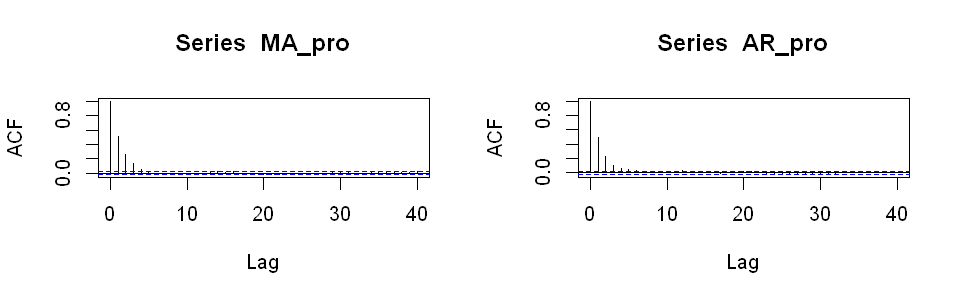

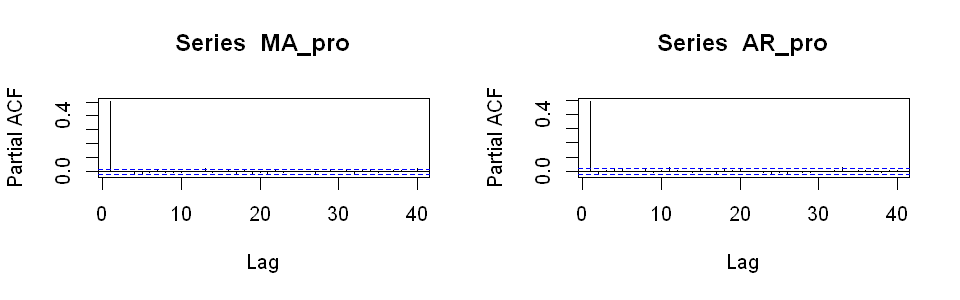

In [2]:
# MA(inf) from AR(1)
MA <- ARMAtoMA(ar = 0.5, ma = 0, lag.max=1000)

# AR(inf) from MA(1)
# AR <- ARMAtoMA(ar = -0.8, ma = 0, lag.max=10)

# Check if MA(inf) equals AR(1)
AR_pro <- arima.sim(n = 10000, list(order=c(1,0,0), ar=c(0.5)))

MA_pro <- arima.sim(n = 10000, list(order=c(0,0,1000), ma=MA))

sd(MA_pro)
sd(AR_pro)

par(mfrow=c(1,2))
acf(MA_pro)
acf(AR_pro)
par(mfrow=c(1,2))
pacf(MA_pro)
pacf(AR_pro)

# Chapter 3
Volatility modeling
## Exercise 1
Empirical regularities about volatility. GARCH(1; 1) example. Part I, (…rst session) In moodle a text …le named exchange.dat has been posted. In this exercise you will
look at various summary statistics and plots to get an (empirical) feeling about return series.
1.

In [51]:
library(readr)
exchange <- read_csv("~/GitHub/Applied-Econometric-Time-Series-WE/Data/exchange.dat", col_names=F, cols(
  X1 = col_double()))
head(exchange)

X1
2.24
2.26
2.29
2.26
2.27
2.30


- Plot the exchange rate and the autocovariance function (correllogram) of the series.
Does the mean look constant over time?

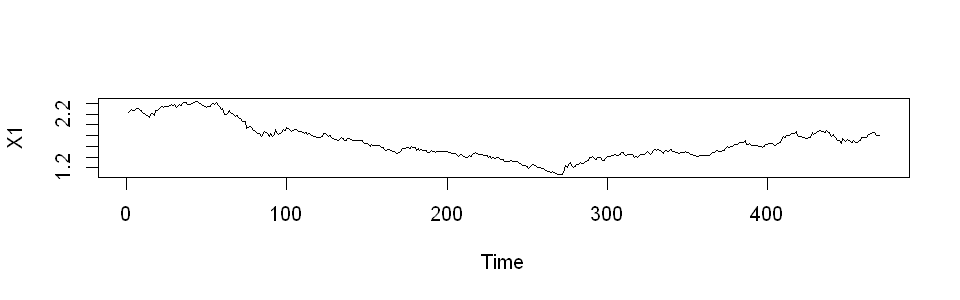

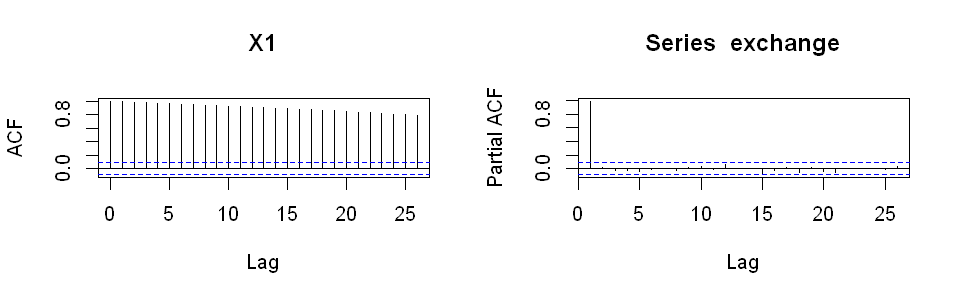

In [52]:
exchange <- as.ts(exchange)

plot(exchange, type="l")
par(mfrow=c(1,2))
acf(exchange)
pacf(exchange)

- Calculate the period-by-period returns and the correllogram. Alternatively, use log-di¤erences. Does the mean now look constant over time? Plot a histogram and possibly also a normal approximation of the histogram. Is the return series approximately normal distributed or do you see "fat tails"?

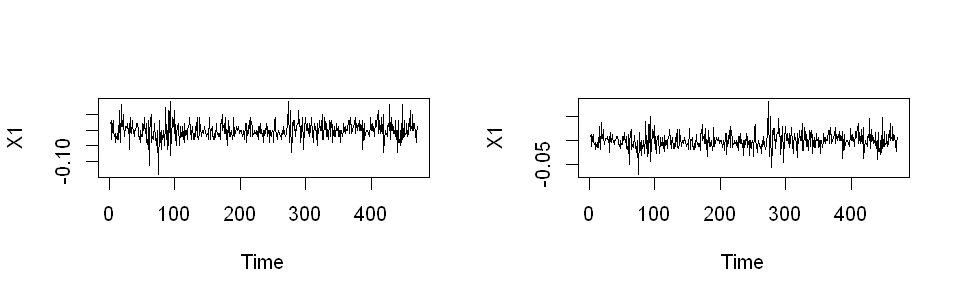

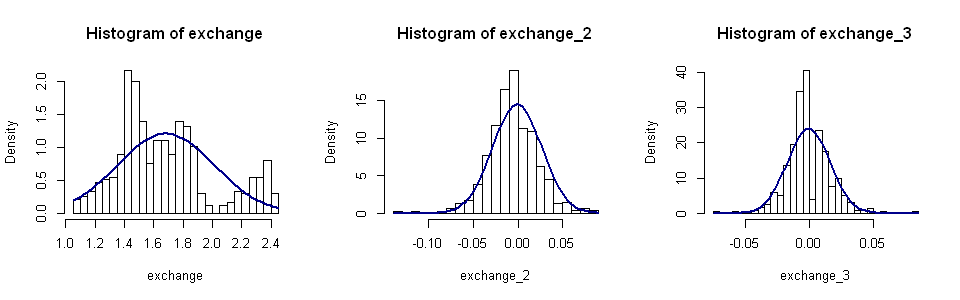

In [44]:
exchange_2 <- diff(exchange)
exchange_3 <- diff(log(exchange))


par(mfrow=c(1,2))
plot(exchange_2, type="l")
plot(exchange_3, type="l")

par(mfrow=c(1,3))
hist(exchange, breaks=30, prob=T)
curve(dnorm(x, mean=mean(exchange), sd=sd(exchange)), 
      col="darkblue", lwd=2, add=TRUE, yaxt="n")
hist(exchange_2, breaks=30, prob=T)
curve(dnorm(x, mean=mean(exchange_2), sd=sd(exchange_2)), 
      col="darkblue", lwd=2, add=TRUE, yaxt="n")
hist(exchange_3, breaks=30, prob=T)
curve(dnorm(x, mean=mean(exchange_3), sd=sd(exchange_3)), 
      col="darkblue", lwd=2, add=TRUE, yaxt="n")

- Calculate the squared returns or alternatively the squared deviations from the mean. Plot the correllogram of the series. What do you see? Comment on your results.

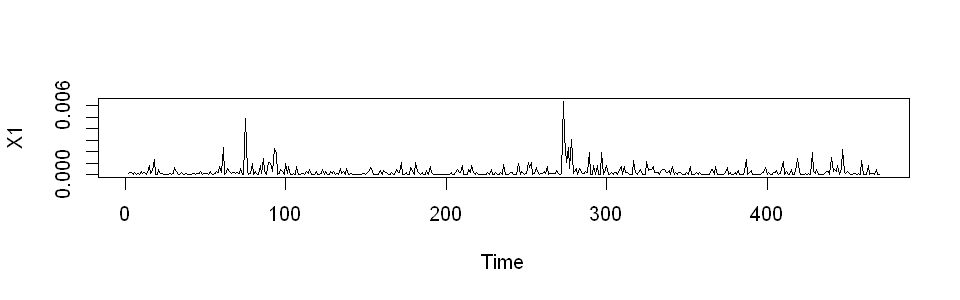

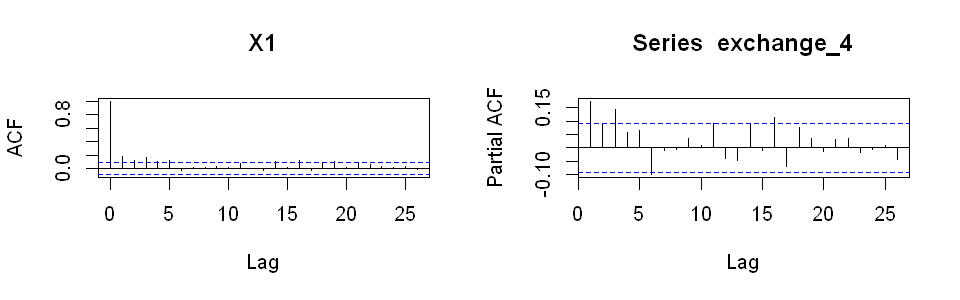

In [57]:
exchange_4 <- exchange_3^2

plot(exchange_4, type="l")
par(mfrow=c(1,2))
acf(exchange_4)
pacf(exchange_4)

- Plot the the of the model versus observed data, in particular plot ht . Does this makes sense compared to observed squared returns.
$$ r_t = \mu + \sqrt{h_t}z_t, \quad z_t \sim iid N (0,1)$$
$$ h_t = \omega + \alpha(r_{t-1} - \mu)^2 + \beta h_{t-1}$$

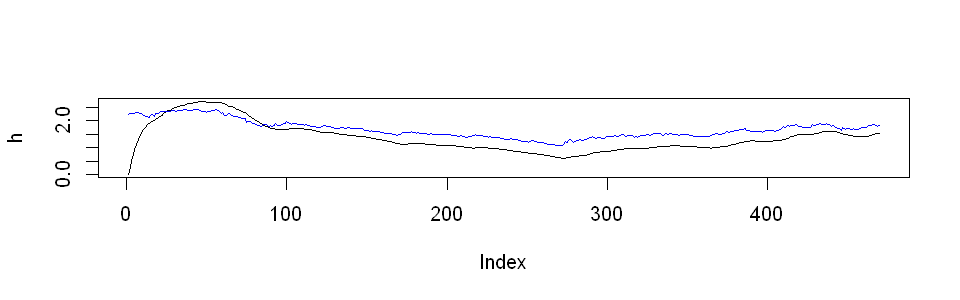

In [64]:
a <- 0.054421
b <- 0.88582
w <- 0.000016421

h <- c(0)

for (i in 2:470) {
    h[i] <- w + a*(exchange[i-1] - 0)^2 + b * h[i-1]
}

plot(h, type="l")
lines(exchange, col="blue")




## Exercise 2. 
Enders exercise 5 chapter 3


In [88]:
arch <- read_delim("~/GitHub/Applied-Econometric-Time-Series-WE/Data/arch.csv", 
    ";", escape_double = FALSE, locale = locale(decimal_mark = ",", 
        grouping_mark = "."), trim_ws = TRUE, col_types = cols(.default = col_double())
)
head(arch)

y,y_m
1.2730,1.4323
0.2211,1.4064
0.5709,0.6849
0.2239,0.7005
1.5600,1.1220
1.5800,0.8773


In [75]:
mean(arch$y)
sd(arch$y)
min(arch$y)
max(arch$y)

[1] 0.2633695

[1] 4.894091

[1] -10.8

[1] 15.15

In [121]:
library(dynlm)

arch$y <- as.ts(arch$y)

reg <- dynlm(arch$y ~ L(arch$y,1))
reg


Time series regression with "ts" data:
Start = 2, End = 100

Call:
dynlm(formula = arch$y ~ L(arch$y, 1))

Coefficients:
 (Intercept)  L(arch$y, 1)  
     0.06219       0.94387  


In [122]:
acf(reg$residuals, plot=F, type="correlation", lag=10)
pacf(reg$residuals, plot=F, type="correlation", lag=10)


Autocorrelations of series 'reg$residuals', by lag

     0      1      2      3      4      5      6      7      8      9     10 
 1.000  0.149  0.005 -0.017 -0.012  0.069  0.003 -0.099 -0.150  0.065  0.101 


Partial autocorrelations of series 'reg$residuals', by lag

     1      2      3      4      5      6      7      8      9     10 
 0.149 -0.018 -0.016 -0.007  0.073 -0.019 -0.099 -0.123  0.112  0.073 

In [123]:
Box.test(reg$residuals,lag=4,type="Ljung-Box")
Box.test(reg$residuals,lag=8,type="Ljung-Box")
Box.test(reg$residuals,lag=24,type="Ljung-Box")


	Box-Ljung test

data:  reg$residuals
X-squared = 2.3256, df = 4, p-value = 0.6761



	Box-Ljung test

data:  reg$residuals
X-squared = 6.382, df = 8, p-value = 0.6045



	Box-Ljung test

data:  reg$residuals
X-squared = 18.501, df = 24, p-value = 0.7781


In [124]:
sres <- reg$residuals^2

acf(sres, plot=F, type="correlation", lag=10)
pacf(sres, plot=F, type="correlation", lag=10)


Autocorrelations of series 'sres', by lag

     0      1      2      3      4      5      6      7      8      9     10 
 1.000  0.469  0.127 -0.051 -0.081  0.057  0.240  0.274  0.224  0.140 -0.014 


Partial autocorrelations of series 'sres', by lag

     1      2      3      4      5      6      7      8      9     10 
 0.469 -0.120 -0.080 -0.011  0.143  0.194  0.078  0.071  0.058 -0.073 

In [125]:
reg2 <- dynlm(sres ~ L(sres,1))
reg2



Time series regression with "ts" data:
Start = 3, End = 100

Call:
dynlm(formula = sres ~ L(sres, 1))

Coefficients:
(Intercept)   L(sres, 1)  
     1.5583       0.4706  


In [135]:
length(sres)*summary(reg2)$r.squared
a <- ((summary(reg)$r.squared - summary(reg2)$r.squared)/1)/(summary(reg2)$r.squared/(length(sres)-(2*1)-1))
a


[1] 21.88564

[1] 285.028

[1] 2.921995e-91

ERROR: Error in checkresiduals(sres): could not find function "checkresiduals"


In [144]:
test <- arch$y
test
arima(test, order=c(1,0,0), method="CSS", include.mean=T)
dynlm(test ~ L(test, 1))

Time Series:
Start = 1 
End = 100 
Frequency = 1 
  [1]   1.273000   0.221100   0.570900   0.223900   1.560000   1.580000
  [7]  -1.627000   0.006158   1.958000   0.366900   1.122000  -0.313400
 [13]  -0.125800  -0.175000   0.716600  -0.139500  -0.734000  -0.046790
 [19]  -0.096180  -0.130400  -0.212700   0.423300  -1.103000  -0.380600
 [25]  -0.764200   0.628800  -0.619000  -0.340200  -0.076230   0.294100
 [31]   0.111200  -0.054890   0.998800  -0.509400  -0.952100  -0.090070
 [37]   1.430000   1.722000   0.914600  -1.945000  -0.093250   0.811700
 [43]  -0.324500   1.092000   0.209300   2.205000   2.316000   2.942000
 [49]   1.732000   1.007000  -0.360900  -1.781000  -1.087000  -2.950000
 [55]   0.971800   1.883000  -0.267900  -2.100000  -0.686000  -1.923000
 [61]  -4.390000  -7.386000  -9.994000 -10.770000 -10.800000  -9.800000
 [67]  -9.178000  -7.006000  -5.825000  -6.793000  -7.697000  -5.696000
 [73]  -4.589000  -4.309000  -3.430000  -2.124000  -0.949300   1.136000
 [79]  -0.8274


Call:
arima(x = test, order = c(1, 0, 0), include.mean = T, method = "CSS")

Coefficients:
         ar1  intercept
      0.9439     1.1068
s.e.  0.0353     3.1061

sigma^2 estimated as 2.935:  part log likelihood = -195.72


Time series regression with "ts" data:
Start = 2, End = 100

Call:
dynlm(formula = test ~ L(test, 1))

Coefficients:
(Intercept)   L(test, 1)  
    0.06219      0.94387  
